In [60]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt
import pickle

## Load datasets from file

In [61]:
# load results_AP_kmean from a file
with open('pickles/results_AP_kmean.pickle', 'rb') as f:
    results_AP_kmean = pickle.load(f)
    
# load results_MM_kmean from a file
with open('pickles/results_MM_kmean.pickle', 'rb') as f:
    results_MM_kmean = pickle.load(f)
    
# load results_RP_meanshift from a file
with open('pickles/results_RP_meanshift.pickle', 'rb') as f:
    results_RP_meanshift = pickle.load(f)

## Merge datasets

In [62]:
merged_df = pd.merge(results_AP_kmean, results_MM_kmean, on='match_id', how='inner')
merged_df = pd.merge(merged_df, results_RP_meanshift, on='match_id', how='inner')

merged_df = merged_df.rename(columns={
    'labels_x': 'AP',
    'labels_y': 'MM',
    'labels': 'RP'
})


## Perform kmodes on ensemble data

In [63]:
from kmodes.kmodes import KModes

# Specify the number of clusters (k)
k = 5

# Initialize the k-modes model
km = KModes(n_clusters=k, init='Huang', n_init=5, verbose=1)

# Fit the model to the data
ensemble_results = km.fit_predict(merged_df[['AP', 'MM', 'RP']])

# Get the cluster centroids (representative values for each cluster)
centroids = km.cluster_centroids_

# Print the cluster labels assigned to each sample
print(ensemble_results)

print(centroids)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 20, cost: 245.0
Run 1, iteration: 2/100, moves: 6, cost: 245.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 131, cost: 255.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 56, cost: 234.0
Run 3, iteration: 2/100, moves: 17, cost: 234.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 71, cost: 251.0
Run 4, iteration: 2/100, moves: 1, cost: 251.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 261.0
Best run was number 3
[0 3 2 3 1 1 0 4 1 0 4 4 4 4 0 3 0 0 0 0 0 4 4 1 0 0 4 1 3 4 4 1 1 0 0 0 0
 2 4 0 0 4 0 0 2 0 1 0 0 0 0 2 0 0 0 0 2 4 0 4 0 0 4 0 1 0 0 4 0 0 1 4 0 2
 3 3 0 0 0 0 1 0 0 0 2 3 0 3 4 0 2 0 0 3 2 0 1

In [ ]:
## Create ensemble bar graphs

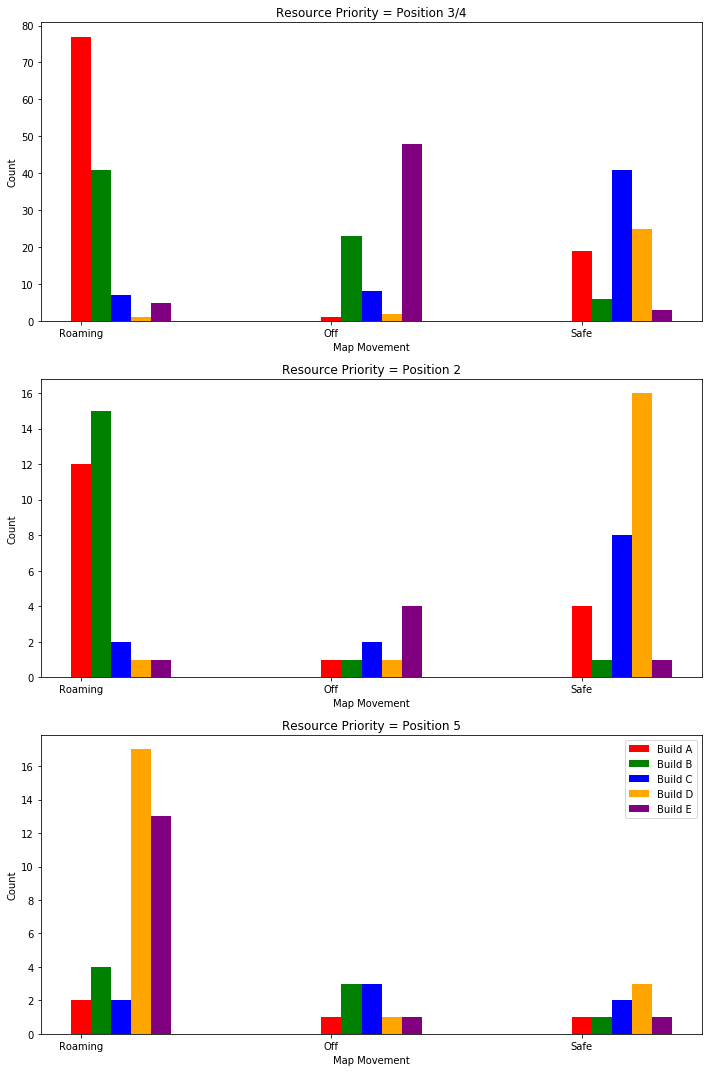

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Define the colors for the AP values
colors = ['red', 'green', 'blue', 'orange', 'purple']

# Filter the dataframe based on RP values
df_rp0 = merged_df[merged_df['RP'] == 0]
df_rp1 = merged_df[merged_df['RP'] == 1]
df_rp2 = merged_df[merged_df['RP'] >= 2]

# Get unique values of MM and AP
mm_values = merged_df['MM'].unique()
ap_values = np.sort(merged_df['AP'].unique())

# Set the width of each bar
bar_width = 0.08

# Set the x positions of the bars
x_pos = np.arange(len(mm_values))

# Create a figure and subplot for each RP value
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

RP_titles = ['Resource Priority = Position 3/4', 
             'Resource Priority = Position 2', 
             'Resource Priority = Position 5']
MM_titles = ['Roaming',
             'Off',
             'Safe']
AP_titles = ['Build A',
             'Build B',
             'Build C',
             'Build D',
             'Build E',]

# Iterate over the RP values and create multi-bar graphs
for i, (rp_df, rp_val) in enumerate(zip([df_rp0, df_rp1, df_rp2], [0, 1, 2])):
    ax = axes[i]
    ax.set_title(RP_titles[i])
    ax.set_xlabel('Map Movement')
    ax.set_ylabel('Count')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(MM_titles)

    # Initialize the bar positions
    bar_pos = [x + (j * bar_width) for x in x_pos for j in range(len(ap_values))]

    # Initialize the counts for each bar
    counts = [0] * (len(mm_values) * len(ap_values))

    # Iterate over the MM values
    for j, mm_val in enumerate(mm_values):
        mm_df = rp_df[rp_df['MM'] == mm_val]

        # Iterate over the AP values
        for k, ap_val in enumerate(ap_values):
            count = len(mm_df[mm_df['AP'] == ap_val]) + 1
            counts[j + (k * len(mm_values))] = count

    # Create the multi-bar graph
    bars = ax.bar(bar_pos, counts, bar_width, align='center', color=colors)


# Create a legend for the AP values
plt.legend(bars[:len(ap_values)], AP_titles)

# Show the plot
plt.tight_layout()
plt.show()

